In [1]:
!pip install cellpose==0.6

     |████████████████████████████████| 13.1 MB 876 kB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for cellpose: filename=cellpose-0.6-py3-none-any.whl size=146176 sha256=fa778aeda57393a893e5cc867d8f9f8623524ff7d8b7b1efe5d3d3e1bfaedfcc
  Stored in directory: /root/.cache/pip/wheels/d4/9e/7b/f541cbed84bd98ee39b2cbc5196b8ae81f894bdacdb1c787f6
Successfully built cellpose


In [2]:
import shutil
import os
cell_dir_path = './cell'
if os.path.exists(cell_dir_path):
    shutil.rmtree(cell_dir_path)
shutil.copytree("../input/somu-data-prep-for-cellpose-2-tif-w-1-chan-masks/cell_dataset", "./cell")

'./cell'

In [3]:
!python -m cellpose \
--train \
--use_gpu \
--dir "./cell/train" \
--test_dir "./cell/test" \
--n_epochs 40 \
--learning_rate 0.02 \
--pretrained_model None 

Downloading: "https://www.cellpose.org/models/cyto_0" to /root/.cellpose/models/cyto_0
100%|██████████████████████████████████████| 25.2M/25.2M [00:01<00:00, 24.6MB/s]
Downloading: "https://www.cellpose.org/models/cyto_1" to /root/.cellpose/models/cyto_1
100%|██████████████████████████████████████| 25.2M/25.2M [00:00<00:00, 27.8MB/s]
Downloading: "https://www.cellpose.org/models/cyto_2" to /root/.cellpose/models/cyto_2
100%|██████████████████████████████████████| 25.2M/25.2M [00:00<00:00, 28.8MB/s]
Downloading: "https://www.cellpose.org/models/cyto_3" to /root/.cellpose/models/cyto_3
100%|██████████████████████████████████████| 25.2M/25.2M [00:00<00:00, 27.9MB/s]
Downloading: "https://www.cellpose.org/models/size_cyto_0.npy" to /root/.cellpose/models/size_cyto_0.npy
100%|██████████████████████████████████████| 3.55k/3.55k [00:00<00:00, 2.63MB/s]
Downloading: "https://www.cellpose.org/models/cytotorch_0" to /root/.cellpose/models/cytotorch_0
100%|██████████████████████████████████████| 

# inference

parsing model string to get cellpose options
** TORCH CUDA version installed and working. **
>>>> using GPU
time spent: running network 0.04s; flow+mask computation 0.20


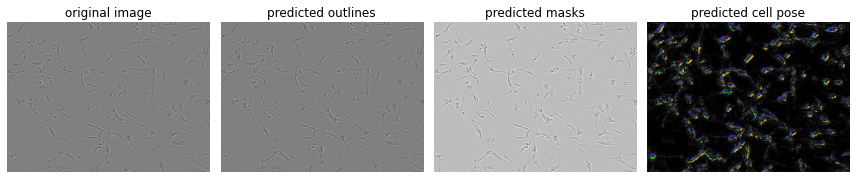

time spent: running network 0.04s; flow+mask computation 0.21


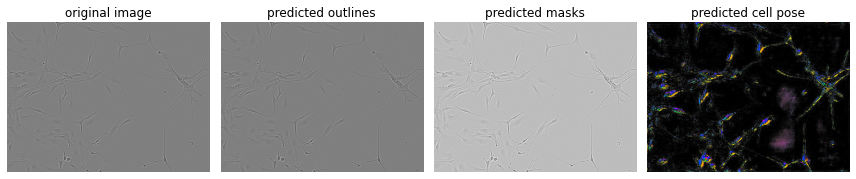

time spent: running network 0.04s; flow+mask computation 0.22


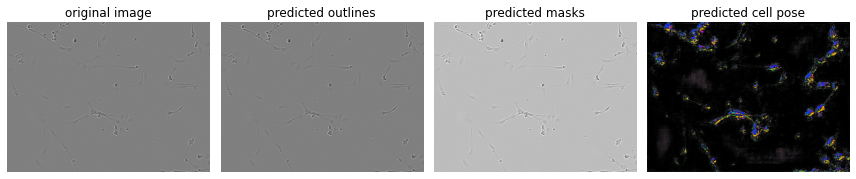

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from cellpose import models, io, plot

def rle_encode(img):
    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

test_dir = "../input/sartorius-cell-instance-segmentation/test/"
test_img_dirs = [test_dir + i for i in os.listdir(test_dir)]


test_imgs = []
for i in test_img_dirs:
    img = cv2.imread(i,cv2.IMREAD_COLOR)
    test_imgs.append(img)

    
model = models.CellposeModel(gpu=True, pretrained_model="/kaggle/working/cell/train/models/cellpose_residual_on_style_on_concatenation_off_train_2021_12_12_04_27_47.649538", torch=True, diam_mean=30.0, net_avg=True, device=None, residual_on=True, style_on=True, concatenation=False)
masks_all = []
styles_all = []
flows_all = []


for img in test_imgs:
    chan = [0,0] # for black and white imgs
    #img = io.imread(filename)
    masks, flows, styles = model.eval(img, diameter=60, channels=chan)

    masks_all.append(masks)
    flows_all.append(flows)
    styles_all.append(styles)

# DISPLAY RESULTS

    fig = plt.figure(figsize=(12,5))
    plot.show_segmentation(fig, img, masks, flows[0], channels=chan)
    plt.tight_layout()
    plt.show()


#model = models.Cellpose(gpu=False, model_type='cyto')
#model = models.Cellpose(gpu=True, model_type='cyto')